<a href="https://colab.research.google.com/github/Steven-Macas/ArbolDecision/blob/main/bike_SAA_stevenMacas_Arbol_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos de aprendizaje supervisado**

---

## Árbol de Decisión

1. https://www.kaggle.com/yasserh/wine-quality-dataset . Clasificación de la calidad del vino según
alguno de sus parámetros (ph, densidad, sulfatos, alcohol, azúcar, etc.). El dataset contiene una serie de
datos sobre unos vino y su calidad (de 0 a 10). Este problema es de clasificación puesto que consiste en
clasificar el vino en concreto en su clase de calidad (valores discretos del cero al 10)

2. https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction. Clasificación binaria. El
objetivo es clasificar entre presencia de enfermedad del corazón o no a partir de una serie de atributos
(edad, sexo, colesterol, etc.). Para ello el dataset contiene una serie de datos pacientes etiquetados si
tienen enfermedad o no.

3. https://www.kaggle.com/schirmerchad/bostonhoustingmlnd. Predicción de precios de las casas de
Boston. El dataset contiene una serie de datos de casas. El objetivo es, dada una serie de parámetros,
predecir el precio que debe tener la casa (MEDV).

4. https://www.kaggle.com/marklvl/bike-sharing-dataset. Predicción de número de bicicletas alquiladas
por cada hora. El dataset contiene una serie de datos como temperatura, humedad, si es día laborable,
etc. El objetivo es predecir cuantas bicicletas se van a alquilar dependiendo de esa serie de parámetros.

Para cada uno de ellos realizar un documento de google colab con los siguientes epígrafes y tareas:


---


A Importación de librerías necesarias


---



B Preproceso

◦ Importación de los datos del dataset

◦ Mostrar las primeras y últimas filas del dataframe importado

◦ Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

◦ Mostrar un mapa de calor que indique la correlación entre variables

◦ Seleccionar las características a tener en cuenta en el estudio

◦ Separar datos entre datos de entrada y etiquetas (resultados)

◦ Separar datos entre entrenamiento y prueba (usando un 80% para entrenamiento y 20% para test)


---



C Entrenamiento y predicción

◦ Elegir, instanciar (eligiendo unos valores concretos, por ejemplo profundidad del árbol 3) y entrenar el modelo

◦ Realizar una predicción con los datos de prueba

◦ Mostrar el árbol de decisión resultante

◦  Mostrar la importancia de cada atributo en el árbol resultante

◦ Intenta guardar el modelo de predicción ya entrenado usando dumpo:

*https://scikit-learn.org/stable/modules/model_persistence.html*

---


D Evaluación

◦Para los problemas de clasificación

*   Mostrar el porcentaje de elementos correctamente clasificados
*   Mostrar la predicción realizada (imprimir la variable con la predicción)
*   Representar gráficamente la clasificación obtenida (matriz de confusión)

◦Para los problemas de regresión

*   Mostrar el error cuadrático medio (mean_squared_error)
*   Mostrar el error absoluto medio (mean_absolute_error)
*   Representar gráficamente los valores predichos con los valores reales

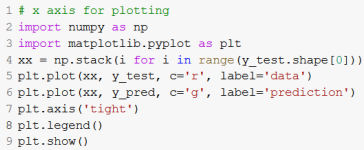

---


E Optimización de hiperparámetros

◦  Calcula la combinación de parámetros óptima (profundidad de árbol y criterio. Para ello realiza ejecuciones con cada uno de los valores del criterio para los valores de profundidad de árbol de 1 a 15

◦Cada ejecución anterior se deberá hacer usando validación cruzada (por ejemplo n_splits = 5). Con ello obtendremos una medida de bondad del modelo (accuracy_score o mean_absolute_error)), como lo ejecutaremos 5 veces, calcularemos la media de esas 5 ejecuciones.

◦Finalmente los parámetros elegidos serán los que den mejor media de esas medidas anteriormente nombradas.

◦ Una vez obtenidos esos parámetros óptimos los aplicaremos al problema en cuestión y mostraremos los resultados.

---

# **A** -Importación de librerías

In [ ]:
#Importamos las librerias necesarias
import pydot #DecisionTree
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree #DecisionTree
from io import StringIO #DecisionTree
import matplotlib.pyplot as plt #Para el mapa de calor, hacer celdas grandes
from IPython.display import Image #DecisionTree
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier #DecisionTree
from sklearn.tree import DecisionTreeRegressor #DecisionTree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay

---


# **B** - Preproceso

In [ ]:
data = pd.read_csv('hour.csv') #Dataset de Bike



---



In [ ]:
data.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [ ]:
data.tail()

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49

In [ ]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object



---



In [ ]:
data.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

---

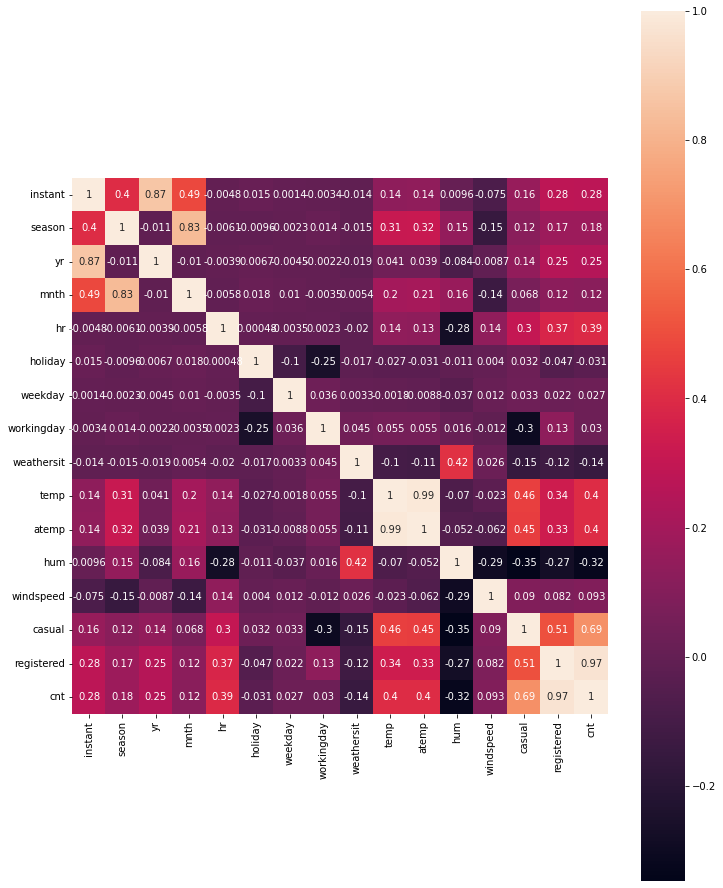

In [ ]:
#Mapa de Calor del DataFrame de Bike
plt.figure(figsize=(12, 16))
map_calor = sns.heatmap(data.corr(),square = True, annot = True)
map_calor

---

**La característica que tendremos en cuenta para el estudio será la Cantidad de Bicicletas**



In [ ]:
#Antes de crear nuestro modelo de arbol, nos va a dar error por la fecha, por lo tanto o lo eliminamos o lo ponemos en un sitio de referencia, por ejemplo en el indice:
data['dteday'] = pd.to_datetime(data['dteday'],errors='coerce')
data.set_index('dteday', inplace=True)
data

instant  season  yr  mnth  hr  holiday  weekday  workingday  \
dteday                                                                    
2011-01-01        1       1   0     1   0        0        6           0   
2011-01-01        2       1   0     1   1        0        6           0   
2011-01-01        3       1   0     1   2        0        6           0   
2011-01-01        4       1   0     1   3        0        6           0   
2011-01-01        5       1   0     1   4        0        6           0   
...             ...     ...  ..   ...  ..      ...      ...         ...   
2012-12-31    17375       1   1    12  19        0        1           1   
2012-12-31    17376       1   1    12  20        0        1           1   
2012-12-31    17377       1   1    12  21        0        1           1   
2012-12-31    17378       1   1    12  22        0        1           1   
2012-12-31    17379       1   1    12  23        0        1           1   

            weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
dteday                                                                          
2011-01-01           1  0.24  0.2879  0.81     0.0000       3          13   16  
2011-01-01           1  0.22  0.2727  0.80     0.0000       8          32   40  
2011-01-01           1  0.22  0.2727  0.80     0.0000       5          27   32  
2011-01-01           1  0.24  0.2879  0.75     0.0000       3          10   13  
2011-01-01           1  0.24  0.2879  0.75     0.0000       0           1    1  
...                ...   ...     ...   ...        ...     ...         ...  ...  
2012-12-31           2  0.26  0.2576  0.60     0.1642      11         108  119  
2012-12-31           2  0.26  0.2576  0.60     0.1642       8          81   89  
2012-12-31           1  0.26  0.2576  0.60     0.1642       7          83   90  
2012-12-31           1  0.26  0.2727  0.56     0.1343      13          48   61  
2012-12-31           1  0.26  0.2727  0.65     0.1343      12          37   49  

[17379 rows x 16 columns]

In [ ]:
#separamos datos de entrada y salida Bike
x_data = data.drop('cnt', axis=1)
y_data = data['cnt']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=1, test_size=0.80)

# **C** - Entrenamiento y Predicción

In [ ]:
arbol = DecisionTreeRegressor(criterion = 'squared_error', max_depth=4) 
arbol.fit(x_train,y_train) 
y_predict = arbol.predict(x_test) 

In [ ]:
x_data.columns.values

array(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered'], dtype=object)

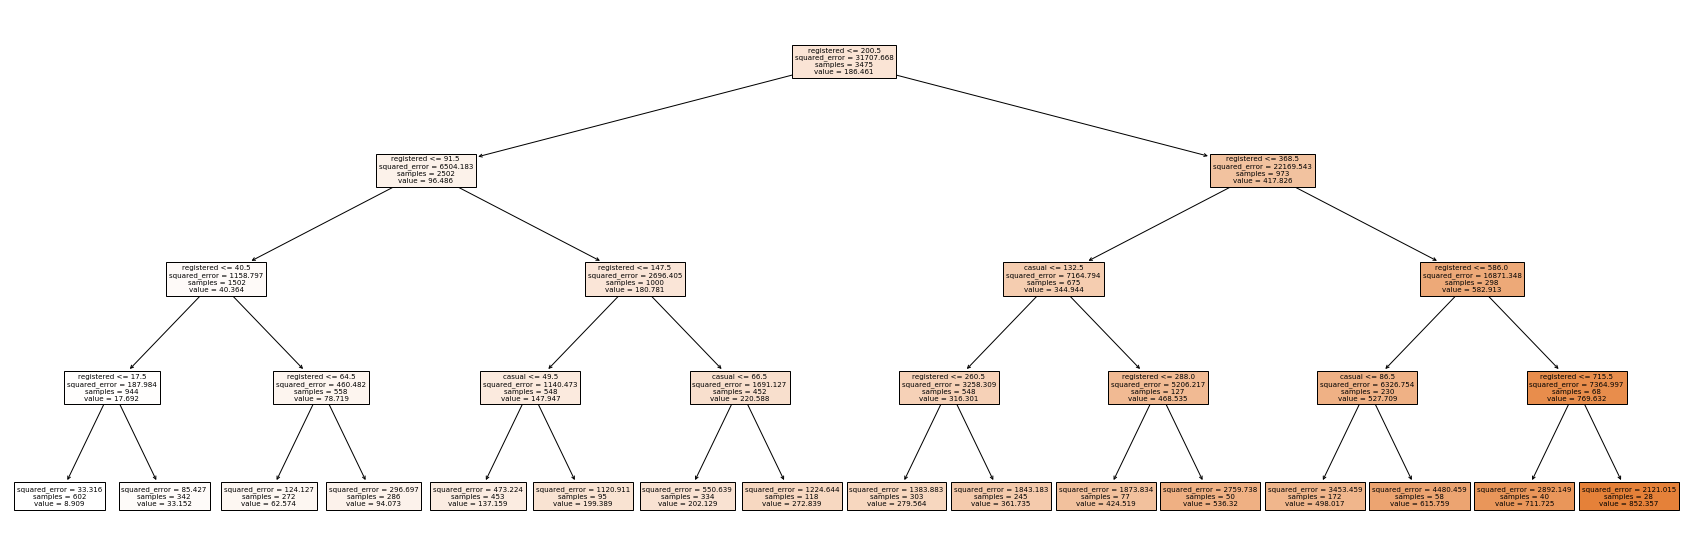

In [ ]:
y_data = y_data.astype(str)
fig = plt.figure(figsize=(30, 10))
tree.plot_tree(arbol, feature_names = list(x_data.columns.values), class_names = list(y_data.values), filled = True)
plt.show()

In [ ]:
#Mostramos las características importantes que influyeron el las decisiones del árbol
for i in range(x_train.columns.shape[0]):
  print(x_train.columns[i],":",arbol.feature_importances_[i])

instant : 0.0
season : 0.0
yr : 0.0
mnth : 0.0
hr : 0.0
holiday : 0.0
weekday : 0.0
workingday : 0.0
weathersit : 0.0
temp : 0.0
atemp : 0.0
hum : 0.0
windspeed : 0.0
casual : 0.03480785191192401
registered : 0.9651921480880761


In [ ]:
#@title Guardar el modelo de predicción ya entrenado usando dump
from joblib import dump, load
dump(arbol, 'modelo_DecisionTree_Heart.joblib')
!ls 

hour.csv  modelo_DecisionTree_Heart.joblib  sample_data


# ***D*** - Evaluación

## **Problemas de clasificación**

In [ ]:
y_predict #Imprimos la predicción

array([361.73469388,  94.07342657, 137.1589404 , ..., 424.51948052,
         8.90863787,   8.90863787])

In [ ]:
#Haremos una predicción de prueba para ver el porcentaje de acierto
bike_prediction = pd.DataFrame({'instant':[1],'season':[1], 'yr':[0], 'mnth':[1], 'hr':[0], 'holiday':[0], 'weekday':[6],
        'workingday':[0], 'weathersit':[1], 'temp':[0.24], 'atemp':[0.2879], 'hum':[0.81], 'windspeed':[0.0000],'casual':[3],'registered':[13]})
arbol.predict(bike_prediction)[0]

8.908637873754152

## **Problemas de regresión**

In [ ]:
arbol = DecisionTreeRegressor(criterion = 'squared_error', max_depth=8)
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=1, test_size=0.80)
arbol.fit(x_train,y_train)
y_predict = arbol.predict(x_test)

### **Error cuadrático medio**

In [ ]:
print(mean_squared_error(y_predict, y_test)) #Bike

1062.6790843052418


### **Error absoluto medio**

In [ ]:
print(mean_absolute_error(y_predict, y_test))#Bike

21.553897816658626


### **Representación gráfica**

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


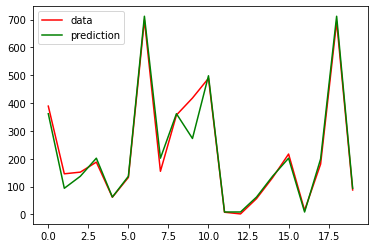

In [ ]:
A = np.stack(i for i in range(20))
plt.plot(A,y_test[:20], c='r', label = 'data')
plt.plot(A,y_predict[:20], c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


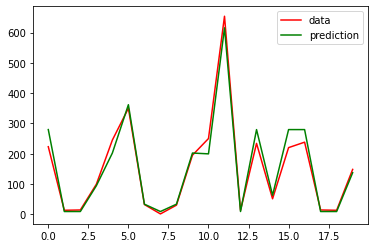

In [ ]:
A = np.stack(i for i in range(20))
plt.plot(A,y_test[20:40], c='r', label = 'data')
plt.plot(A,y_predict[20:40], c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


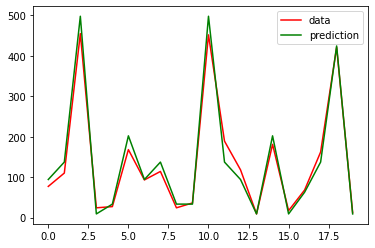

In [ ]:
A = np.stack(i for i in range(20))
plt.plot(A,y_test[40:60], c='r', label = 'data')
plt.plot(A,y_predict[40:60], c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()



---

# **E** - Optimización de hiperparámetros

## **Combinación de parámetros óptima**

## Calcula la combinación de parámetros óptima (squared_error o absolute_error; valor de k). Para ello realiza ejecuciones con cada uno de los valores uniform y distance para los valores de k desde 1 a 30.

In [ ]:
#Cada ejecución anterior se deberá hacer usando validación cruzada (por ejemplo n_splits =5).
#Con ello obtendremos una medida de bondad del modelo (accuracy_score o mean_absolute_error)),
#como lo ejecutaremos 5 veces, calcularemos la media de esas 5 ejecuciones.

import statistics

opt_squared_error = 0.0
opt_absolute_error = 0.0
k_opt_squared_error = 1
k_opt_absolute_error = 1

for i in range(1,15):
  k = i
  w1 = 'squared_error'
  w2 = 'absolute_error'
  print(i)
  resultados_prob = []
  kf = KFold(n_splits=5) #Indicamos que se repetirá 5 veces
  for train, test in kf.split(x_data):
    x_train, x_test = x_data.iloc[train], x_data.iloc[test]
    y_train, y_test = y_data.iloc[train], y_data.iloc[test]
    model = DecisionTreeRegressor(criterion = 'squared_error', max_depth=i)
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    porcentage_squared_error = mean_squared_error(y_test,y_predict)
    print(f'Score: {porcentage_squared_error}')
    resultados_prob.append(porcentage_squared_error) #Guardamos el porcentaje para hacer la media y tener un menor margen de error
  media_prob = statistics.mean(resultados_prob)
  print(f'Media: {media_prob}')

  if media_prob > opt_squared_error:
    opt_squared_error = media_prob
    print(opt_squared_error)
    k_opt_squared_error = k
  print('-----------------')
  resultados_prob.clear()
  media_prob = 0
  kf = KFold(n_splits=5)
  for train, test in kf.split(x_train):
    x_train, x_test = x_data.iloc[train], x_data.iloc[test]
    y_train, y_test = y_data.iloc[train], y_data.iloc[test]
    model = DecisionTreeRegressor(criterion = 'absolute_error', max_depth=i)
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    porcentage_absolute_error = mean_absolute_error(y_test,y_predict)
    print(f'Score: {porcentage_absolute_error}')
    resultados_prob.append(porcentage_absolute_error)
  media_prob = statistics.mean(resultados_prob)
  print(f'Media: {media_prob}')

  if media_prob > opt_absolute_error:
    opt_absolute_error = media_prob
    print(opt_absolute_error)
    k_opt_absolute_error = k
  resultados_prob.clear()
  media_prob = 0

1
Score: 6989.255695948696
Score: 9590.644177560187
Score: 8204.364221929487
Score: 17864.449406434334
Score: 19279.417531686664
Media: 12385.626206711873
12385.626206711873
-----------------
Score: 49.08126573175117
Score: 72.6497662711255
Score: 64.59079467817332
Score: 71.93491549802229
Score: 118.44388489208633
Media: 75.34012541423172
75.34012541423172
2
Score: 2398.7904832325694
Score: 3534.599300895395
Score: 3430.47157632741
Score: 8008.539250949062
Score: 7319.50950814679
Media: 4938.382023910245
-----------------
Score: 30.841963322545848
Score: 44.334771664868754
Score: 39.47213232650126
Score: 42.18446601941748
Score: 76.14820143884891
Media: 46.59630695443645
3
Score: 1256.676956072953
Score: 2110.3559562256887
Score: 1565.514855122988
Score: 3485.720029599685
Score: 3618.489315729477
Media: 2407.3514225501585
-----------------
Score: 18.97015462064006
Score: 32.863358504135206
Score: 26.438331535418914
Score: 29.087019057892846
Score: 55.94532374100719
Media: 32.660837491

In [ ]:
print(k_opt_squared_error)
k_opt_absolute_error

8


6

### Imprimimos la probabilidad de acierto tanto de squared_error como absolute_error

In [ ]:
opt_squared_error

12385.626206711873

In [ ]:
opt_absolute_error

75.34012541423172

## Parámetros óptimos obtenidos

In [ ]:
#aplicamos los datos obtenidos al problema en cuestión
arbol = DecisionTreeRegressor(criterion = 'squared_error', max_depth=8)
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=1, test_size=0.80)
arbol.fit(x_train,y_train)
y_predict = arbol.predict(x_test)

# Error cuadrático medio
squared_error = mean_squared_error(y_test, y_predict)
# Error absoluto medio
absolute_error = mean_absolute_error(y_test, y_predict)

print('Estos son los resultados')
print('------------------------')
print('Error cuadrático medio: ', round(squared_error,2))
print('Error absoluto medio: ', round(absolute_error,2))

Estos son los resultados
------------------------
Error cuadrático medio:  118.16
Error absoluto medio:  6.42


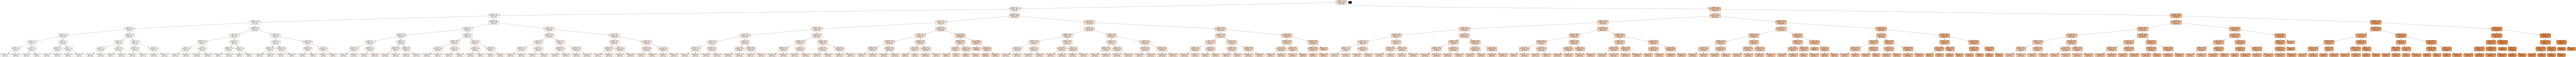

In [ ]:
dot_data = StringIO()

tree.export_graphviz(arbol, 
                     out_file= dot_data,
                     class_names=arbol.feature_names_in_.astype(str),
                     feature_names=x_train.columns,
                     rounded=True,
                     filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

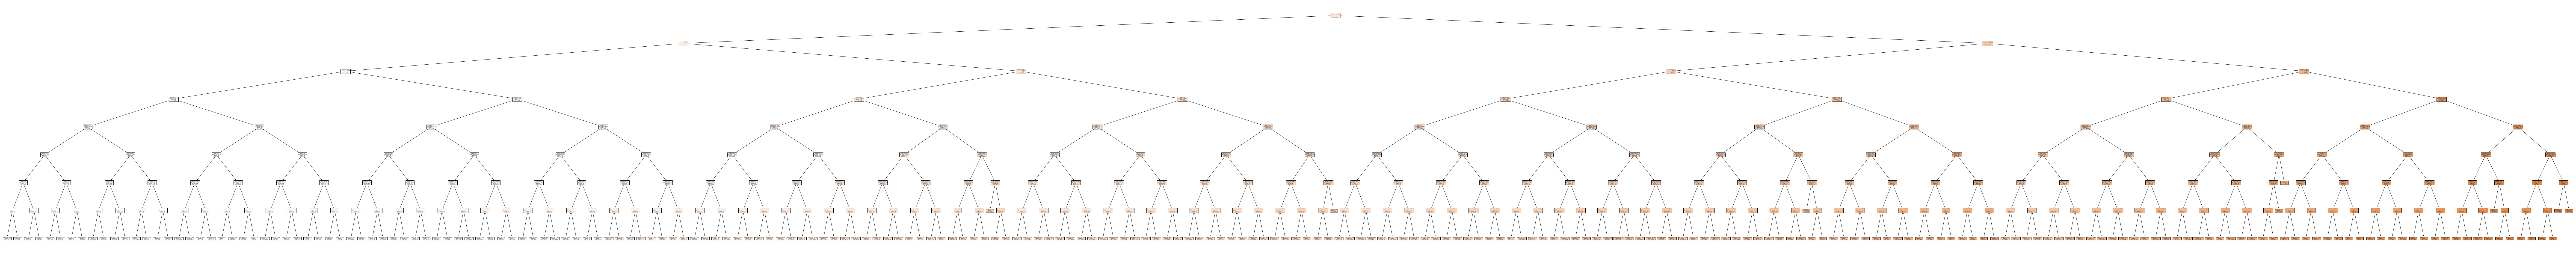

In [ ]:
#Usando esta forma se puede apreciar un poquito mejor cómo es el árbol aunque no podamos ver con claridad la información
y_data = y_data.astype(str)
fig = plt.figure(figsize=(200, 20))
tree.plot_tree(arbol, feature_names = list(x_data.columns.values), class_names = list(y_data.values), filled = True)
plt.show()